# Projeto 1
## Introdução a Data Science
### Alunos
Gabriel de Melo Evangelista (gme@cin.ufpe.br)

Maria Luísa Leandro de Lima (mlll@cin.ufpe.br)
### Tema: Powerlifting
https://openpowerlifting.gitlab.io/opl-csv/bulk-csv-docs.html

### Imports

Aqui são feitos os imports das bibliotecas utilizadas

In [7]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error as mse

### 1. Coleta de dados

In [8]:
df = pd.read_csv('../openpowerlifting.csv')

C:\Users\GODZILLA\AppData\Local\Temp\ipykernel_17484\2368287622.py:1: DtypeWarning: Columns (33,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../openpowerlifting.csv')


In [9]:
df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,Alona Vladi,F,SBD,Raw,33.0,24-34,24-39,O,58.30,60,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
1,Galina Solovyanova,F,SBD,Raw,43.0,40-44,40-49,M1,73.10,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
2,Daniil Voronin,M,SBD,Raw,15.5,16-17,14-18,T,67.40,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
3,Aleksey Krasov,M,SBD,Raw,35.0,35-39,24-39,O,66.65,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
4,Margarita Pleschenkova,M,SBD,Raw,26.5,24-34,24-39,O,72.45,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament


In [10]:
df.shape

(2744390, 41)

Observamos que os dados tem cerca de 2.7 milhões de entradas com 41 colunas.

In [11]:
df.columns

Index(['Name', 'Sex', 'Event', 'Equipment', 'Age', 'AgeClass',
       'BirthYearClass', 'Division', 'BodyweightKg', 'WeightClassKg',
       'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Squat4Kg', 'Best3SquatKg',
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Bench4Kg', 'Best3BenchKg',
       'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Deadlift4Kg',
       'Best3DeadliftKg', 'TotalKg', 'Place', 'Dots', 'Wilks', 'Glossbrenner',
       'Goodlift', 'Tested', 'Country', 'State', 'Federation',
       'ParentFederation', 'Date', 'MeetCountry', 'MeetState', 'MeetTown',
       'MeetName'],
      dtype='object')

Vamos analisar algumas das colunas para que possamos filtrar nossos dados

A coluna de "Event" indica o tipo de competição que o levantador participou. 

Os valores podem ser:

* SBD: Agachamento, Supino e Deadlift
* BD: Supino e Deadlift
* SD: Agachamento e Deadlift
* SB: Agachamento e Supino
* S: Apenas Agachamento
* B: Apenas Supino
* D: Apenas Deadlift



In [12]:
df['Event'].value_counts()

SBD    1886059
B       627304
D       157510
BD       53965
S        14886
SB        2876
SD        1790
Name: Event, dtype: int64

Observa-se que a maior parte dos eventos foi do tipo mais completo, decidiu-se então seguir apenas com o evento SBD.

A coluna Equipment indica a categoria do equipamento em que os levantamentos foram feitos.

Os valores podem ser:

* Raw: Sem equipamentos
* Wraps: Faixas de joelho são permitidas
* Single-ply: Macacão de powerlifting
* Multi-ply: Macacão com outros acessórios
* Unlimited: Quaisquer equipamento pode ser utilizado
* Straps: Straps para deadlift

In [13]:
df['Equipment'].value_counts()

Single-ply    1312406
Raw           1127258
Wraps          177562
Multi-ply      119583
Unlimited        7535
Straps             46
Name: Equipment, dtype: int64

Observa-se que a maior parte dos eventos são com Single-ply e Raw por isso decidiu-se seguir apenas com esses 2.

A coluna de Posição não possui apenas números, podendo possuir as seguintes categorias:

* DQ: Desclassificado
* NS: Não participou
* G: Participante convidado
* DD: Desclassificado por doping

In [14]:
df[~df['Place'].str.isnumeric()]['Place'].value_counts()

DQ    173956
NS     14671
G       7461
DD      1506
Name: Place, dtype: int64

Como há apenas interesse na posição numérica dos participantes, é feita a retirada de tais categorias.

In [15]:
df = df[(df['Place'].str.isnumeric()) & (df['Event']=='SBD') & (df['Equipment'].isin(['Single-ply', 'Raw']))]

Além disso como não há interesse nas seguintes colunas, elas serão removidas.

In [16]:
df = df.drop(['Date','Federation', 'MeetName','MeetCountry','MeetState','MeetTown','Tested'], axis=1)

In [17]:
df.shape

(1522738, 34)

Com estes cortes, os dados passaram a ter cerca 1.5 milhões de linhas

In [18]:
df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Best3DeadliftKg,TotalKg,Place,Dots,Wilks,Glossbrenner,Goodlift,Country,State,ParentFederation
0,Alona Vladi,F,SBD,Raw,33.0,24-34,24-39,O,58.30,60,...,107.5,247.5,1,279.44,282.18,249.42,57.10,Russia,NaN,NaN
1,Galina Solovyanova,F,SBD,Raw,43.0,40-44,40-49,M1,73.10,75,...,110.0,282.5,1,278.95,272.99,240.35,56.76,Russia,NaN,NaN
2,Daniil Voronin,M,SBD,Raw,15.5,16-17,14-18,T,67.40,75,...,105.0,267.5,1,206.40,206.49,200.45,41.24,Russia,NaN,NaN
3,Aleksey Krasov,M,SBD,Raw,35.0,35-39,24-39,O,66.65,75,...,170.0,430.0,1,334.49,334.94,325.32,66.68,Russia,NaN,NaN
4,Margarita Pleschenkova,M,SBD,Raw,26.5,24-34,24-39,O,72.45,75,...,125.0,265.0,1,194.46,193.55,187.29,39.34,Russia,NaN,NaN


### 2. Pré-processamento dos dados

#### 2.1 Análise

##### 2.1.1 Definição de tipos

In [19]:
df.dtypes

Name                 object
Sex                  object
Event                object
Equipment            object
Age                 float64
AgeClass             object
BirthYearClass       object
Division             object
BodyweightKg        float64
WeightClassKg        object
Squat1Kg            float64
Squat2Kg            float64
Squat3Kg            float64
Squat4Kg            float64
Best3SquatKg        float64
Bench1Kg            float64
Bench2Kg            float64
Bench3Kg            float64
Bench4Kg            float64
Best3BenchKg        float64
Deadlift1Kg         float64
Deadlift2Kg         float64
Deadlift3Kg         float64
Deadlift4Kg         float64
Best3DeadliftKg     float64
TotalKg             float64
Place                object
Dots                float64
Wilks               float64
Glossbrenner        float64
Goodlift            float64
Country              object
State                object
ParentFederation     object
dtype: object

Percebe-se que há diversas colunas com tipo "object", portanto é feita a troca para categoria e a criação de novas colunas com os valores traduzidos para códigos.

In [20]:
df['Sex'] = df['Sex'].astype('category')
df['Equipment'] = df['Equipment'].astype('category')
df['Division'] = df['Division'].astype('category')
df['WeightClassKg'] = df['WeightClassKg'].astype('category')
df['Place'] = df['Place'].astype('category')
df['Name'] = df['Name'].astype('category')

In [21]:
df['Sex'] = df['Sex'].cat.codes
df['EquipmentC'] = df['Equipment'].cat.codes
df['DivisionC'] = df['Division'].cat.codes
df['WeightClassKgC'] = df['WeightClassKg'].cat.codes
df['PlaceC'] = df['Place'].cat.codes
df['NameC'] = df['Name'].cat.codes

In [22]:
df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Glossbrenner,Goodlift,Country,State,ParentFederation,EquipmentC,DivisionC,WeightClassKgC,PlaceC,NameC
0,Alona Vladi,0,SBD,Raw,33.0,24-34,24-39,O,58.30,60,...,249.42,57.10,Russia,NaN,NaN,0,1865,138,0,23976
1,Galina Solovyanova,0,SBD,Raw,43.0,40-44,40-49,M1,73.10,75,...,240.35,56.76,Russia,NaN,NaN,0,1196,189,0,165932
2,Daniil Voronin,1,SBD,Raw,15.5,16-17,14-18,T,67.40,75,...,200.45,41.24,Russia,NaN,NaN,0,2171,189,0,114094
3,Aleksey Krasov,1,SBD,Raw,35.0,35-39,24-39,O,66.65,75,...,325.32,66.68,Russia,NaN,NaN,0,1865,189,0,15365
4,Margarita Pleschenkova,1,SBD,Raw,26.5,24-34,24-39,O,72.45,75,...,187.29,39.34,Russia,NaN,NaN,0,1865,189,0,300972


##### 2.1.2 Tratamento de dados ausentes

In [23]:
df.isna().sum(axis=0)

Name                      0
Sex                       0
Event                     0
Equipment                 0
Age                  726249
AgeClass             551205
BirthYearClass       681413
Division               1173
BodyweightKg          11885
WeightClassKg          8586
Squat1Kg             989817
Squat2Kg             994541
Squat3Kg            1007495
Squat4Kg            1519175
Best3SquatKg           9331
Bench1Kg             989986
Bench2Kg             993814
Bench3Kg            1007523
Bench4Kg            1519683
Best3BenchKg           9315
Deadlift1Kg          989600
Deadlift2Kg          996298
Deadlift3Kg         1015185
Deadlift4Kg         1516988
Best3DeadliftKg        9277
TotalKg                   0
Place                     0
Dots                  11885
Wilks                 11885
Glossbrenner          11885
Goodlift              12790
Country              799232
State               1213230
ParentFederation     581936
EquipmentC                0
DivisionC           

Observa-se que no dataset há uma grande quantidade de dados ausentes, porém como há também uma grande quantidade de linhas é feita a remoção de colunas com mais de 70% de dados ausentes.
Porém, a coluna de idade será importante para as hipóteses, portanto é feita sua recolocação.

In [24]:
dfnaclean = df.dropna(thresh=0.7*len(df), axis=1)
dfnaclean['Age'] = df['Age']

C:\Users\GODZILLA\AppData\Local\Temp\ipykernel_17484\1516559056.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnaclean['Age'] = df['Age']


In [25]:
dfnaclean.shape

(1522738, 22)

Os dados passaram a ter 22 colunas.

In [26]:
dfnaclean.head()

,Name,Sex,Event,Equipment,Division,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,...,Dots,Wilks,Glossbrenner,Goodlift,EquipmentC,DivisionC,WeightClassKgC,PlaceC,NameC,Age
0,Alona Vladi,0,SBD,Raw,O,58.30,60,80.0,60.0,107.5,...,279.44,282.18,249.42,57.10,0,1865,138,0,23976,33.0
1,Galina Solovyanova,0,SBD,Raw,M1,73.10,75,105.0,67.5,110.0,...,278.95,272.99,240.35,56.76,0,1196,189,0,165932,43.0
2,Daniil Voronin,1,SBD,Raw,T,67.40,75,100.0,62.5,105.0,...,206.40,206.49,200.45,41.24,0,2171,189,0,114094,15.5
3,Aleksey Krasov,1,SBD,Raw,O,66.65,75,137.5,122.5,170.0,...,334.49,334.94,325.32,66.68,0,1865,189,0,15365,35.0
4,Margarita Pleschenkova,1,SBD,Raw,O,72.45,75,90.0,50.0,125.0,...,194.46,193.55,187.29,39.34,0,1865,189,0,300972,26.5


##### 2.1.3 Tratamento de dados duplicados

In [27]:
dfnaclean[dfnaclean.duplicated()]

,Name,Sex,Event,Equipment,Division,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,...,Dots,Wilks,Glossbrenner,Goodlift,EquipmentC,DivisionC,WeightClassKgC,PlaceC,NameC,Age
4340,Alexis Carvalho,1,SBD,Raw,Open,81.80,82.5,220.0,157.5,250.0,...,427.13,422.53,406.72,87.51,0,1868,216,0,20680,22.0
38785,Hannah Kaminski,0,SBD,Raw,Juniors 20-24,51.90,52,115.0,57.5,125.0,...,363.11,371.43,329.26,75.25,0,886,109,0,178024,24.0
38786,Lisa Budau,0,SBD,Raw,Juniors 20-24,54.10,56,97.5,60.0,127.5,...,338.08,344.52,304.99,69.63,0,886,124,0,282744,24.0
44487,Samantha Brickhouse,0,SBD,Raw,Juniors 20-24,42.77,44,60.0,42.5,100.0,...,285.10,290.47,261.42,62.04,0,886,92,0,396516,NaN
44489,Sumaya Shakir,0,SBD,Raw,Open,43.68,44,75.0,42.5,85.0,...,280.48,286.52,257.21,60.60,0,1868,92,0,421197,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2721661,Eric Mauchosse,1,SBD,Single-ply,Masters 2,89.40,90,290.0,180.0,275.0,...,483.35,477.24,457.52,82.51,1,1727,243,0,149957,51.0
2722881,Lars Höglander,1,SBD,Single-ply,Masters 2,92.60,93,260.0,182.5,250.0,...,441.52,435.92,417.29,75.27,1,1727,257,0,275463,53.5
2722899,P.O. Larsson,1,SBD,Single-ply,Masters 2,121.95,120+,282.5,212.5,275.0,...,439.87,441.08,422.63,73.96,1,1727,45,0,354056,50.5
2722942,Annelie Izindre,0,SBD,Single-ply,Masters 1,59.90,63,157.5,102.5,135.0,...,438.34,440.95,389.61,73.44,1,1723,148,32,38508,45.5


Há mais de 3000 linhas de dados duplicados, portanto é feita sua remoção utilizando a função .drop_duplicates().

In [28]:
dfnaclean.drop_duplicates(inplace=True)

C:\Users\GODZILLA\AppData\Local\Temp\ipykernel_17484\1111256310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnaclean.drop_duplicates(inplace=True)


#### 2.2 Inserindo dados ausentes em mais de uma coluna

In [29]:
dfnaclean.isnull().sum()

Name                    0
Sex                     0
Event                   0
Equipment               0
Division             1173
BodyweightKg        11877
WeightClassKg        8586
Best3SquatKg         9316
Best3BenchKg         9300
Best3DeadliftKg      9262
TotalKg                 0
Place                   0
Dots                11877
Wilks               11877
Glossbrenner        11877
Goodlift            12779
EquipmentC              0
DivisionC               0
WeightClassKgC          0
PlaceC                  0
NameC                   0
Age                724358
dtype: int64

Nesta etapa será realizado um estudo comparativo do RMSE das técnicas disponíveis para imputação de dados na biblioteca fancyimpute.

In [30]:
dfnaclean.columns

Index(['Name', 'Sex', 'Event', 'Equipment', 'Division', 'BodyweightKg',
       'WeightClassKg', 'Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg',
       'TotalKg', 'Place', 'Dots', 'Wilks', 'Glossbrenner', 'Goodlift',
       'EquipmentC', 'DivisionC', 'WeightClassKgC', 'PlaceC', 'NameC', 'Age'],
      dtype='object')

O seguinte conjunto de colunas será utilizado para simular 1000 dados ausentes da 4 coluna em diante.

In [31]:
incomplete_mask = ['Sex', 'EquipmentC', 'DivisionC', 'BodyweightKg', 'Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg', 'TotalKg', 'PlaceC', 'Dots', 'Wilks', 'Glossbrenner', 'Goodlift']

Aqui é criado o dataset com 10000 samples e nenhum valor ausente.

In [32]:
df_complete = dfnaclean[incomplete_mask].dropna().sample(10000).reset_index(drop=True)
df_incomplete = df_complete.copy()

A seguinte função insere 1000 valores nulos na coluna passada

In [33]:
def nanMaker(x):
    df_incomplete[x][df_incomplete.sample(1000).index] = np.NaN
    
[nanMaker(x) for x in incomplete_mask[3:]]

C:\Users\GODZILLA\AppData\Local\Temp\ipykernel_17484\2669515959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_incomplete[x][df_incomplete.sample(1000).index] = np.NaN
C:\Users\GODZILLA\AppData\Local\Temp\ipykernel_17484\2669515959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_incomplete[x][df_incomplete.sample(1000).index] = np.NaN
C:\Users\GODZILLA\AppData\Local\Temp\ipykernel_17484\2669515959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

[None, None, None, None, None, None, None, None, None, None]

In [34]:
df_incomplete.isna().sum()

Sex                   0
EquipmentC            0
DivisionC             0
BodyweightKg       1000
Best3SquatKg       1000
Best3BenchKg       1000
Best3DeadliftKg    1000
TotalKg            1000
PlaceC             1000
Dots               1000
Wilks              1000
Glossbrenner       1000
Goodlift           1000
dtype: int64

Acima e abaixo percebemos que a inserção de dados ausentes funcionou.

In [35]:
df_incomplete.sample(10)

,Sex,EquipmentC,DivisionC,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,PlaceC,Dots,Wilks,Glossbrenner,Goodlift
7401,1,0,1626,108.00,210.00,150.00,230.00,590.0,0.0,351.89,349.22,333.61,71.90
4872,1,1,171,110.00,283.50,190.51,283.50,757.5,0.0,448.64,445.78,426.06,NaN
9519,1,0,1337,79.20,207.50,122.50,242.50,572.5,NaN,397.13,393.35,379.17,NaN
351,0,1,1868,56.00,70.00,42.50,112.50,225.0,NaN,260.80,NaN,234.17,43.62
8067,1,0,1868,80.65,190.00,130.00,250.00,570.0,0.0,NaN,387.17,372.92,80.06
4912,0,0,871,74.21,155.00,NaN,177.50,420.0,0.0,NaN,401.95,353.71,NaN
829,1,1,1134,67.50,249.93,175.09,237.68,662.7,0.0,510.77,510.95,495.98,87.37
4694,1,1,156,65.68,NaN,102.06,181.44,NaN,54.0,351.34,352.23,342.34,60.05
3291,1,1,156,NaN,161.03,81.65,181.44,NaN,NaN,291.82,NaN,NaN,49.95
4930,1,1,1868,89.40,NaN,192.50,265.00,NaN,1.0,473.62,467.63,448.30,80.85


O SimpleFill substitui os valores ausentes pela média ou mediana de cada coluna.

In [38]:
import fancyimpute as fi
df_SimpleFill = pd.DataFrame(data=fi.SimpleFill().fit_transform(df_incomplete)[0:,0:], columns=incomplete_mask)
sf_mape = mse(df_SimpleFill, df_complete, multioutput='raw_values', squared=False)

KNN utiliza a diferença média quadrática das K características próximas. Vamos passar como argumento um normalizador para os dados, uma vez que o KNN se baseia em distância euclidiana e os dados não foram normalizados antes.

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_KNN = pd.DataFrame(data=fi.KNN(k=5, normalizer=scaler).fit_transform(df_incomplete)[0:,0:], columns=incomplete_mask)
knn_mape = mse(df_KNN, df_complete, multioutput='raw_values', squared=False)

Imputing row 1/10000 with 0 missing, elapsed time: 15.041
Imputing row 101/10000 with 0 missing, elapsed time: 15.048
Imputing row 201/10000 with 1 missing, elapsed time: 15.053
Imputing row 301/10000 with 1 missing, elapsed time: 15.059
Imputing row 401/10000 with 0 missing, elapsed time: 15.064
Imputing row 501/10000 with 1 missing, elapsed time: 15.070
Imputing row 601/10000 with 0 missing, elapsed time: 15.075
Imputing row 701/10000 with 1 missing, elapsed time: 15.081
Imputing row 801/10000 with 1 missing, elapsed time: 15.085
Imputing row 901/10000 with 1 missing, elapsed time: 15.090
Imputing row 1001/10000 with 1 missing, elapsed time: 15.095
Imputing row 1101/10000 with 2 missing, elapsed time: 15.100
Imputing row 1201/10000 with 1 missing, elapsed time: 15.105
Imputing row 1301/10000 with 1 missing, elapsed time: 15.110
Imputing row 1401/10000 with 0 missing, elapsed time: 15.115
Imputing row 1501/10000 with 1 missing, elapsed time: 15.120
Imputing row 1601/10000 with 0 missi

SoftImpute utiliza preenchimento de matriz por iterative soft thresholding de decomposições de valor único.

In [40]:
df_SoftImpute = pd.DataFrame(data=fi.SoftImpute().fit_transform(df_incomplete)[0:,0:], columns=incomplete_mask)
si_mape = mse(df_SoftImpute, df_complete, multioutput='raw_values', squared=False)

[SoftImpute] Max Singular Value of X_init = 150216.581326
[SoftImpute] Iter 1: observed MAE=15.450131 rank=10
[SoftImpute] Iter 2: observed MAE=15.674174 rank=8
[SoftImpute] Iter 3: observed MAE=15.701731 rank=7
[SoftImpute] Iter 4: observed MAE=15.644782 rank=7
[SoftImpute] Iter 5: observed MAE=15.564753 rank=6
[SoftImpute] Iter 6: observed MAE=14.895240 rank=4
[SoftImpute] Iter 7: observed MAE=14.481853 rank=4
[SoftImpute] Iter 8: observed MAE=14.270402 rank=4
[SoftImpute] Iter 9: observed MAE=14.156792 rank=4
[SoftImpute] Iter 10: observed MAE=14.094028 rank=4
[SoftImpute] Iter 11: observed MAE=14.058569 rank=4
[SoftImpute] Iter 12: observed MAE=14.038273 rank=4
[SoftImpute] Iter 13: observed MAE=14.026276 rank=4
[SoftImpute] Iter 14: observed MAE=14.018981 rank=4
[SoftImpute] Iter 15: observed MAE=14.014427 rank=4
[SoftImpute] Iter 16: observed MAE=14.011573 rank=4
[SoftImpute] Iter 17: observed MAE=14.009764 rank=4
[SoftImpute] Stopped after iteration 17 for lambda=3004.331627


IterativeImputer utiliza a modelagem de cada feature com valores ausentes como uma função de outras features de uma maneira round-robin.

In [41]:
df_IterativeImputer = pd.DataFrame(data=fi.IterativeImputer(max_iter=100).fit_transform(df_incomplete)[0:,0:], columns=incomplete_mask)
ii_mape = mse(df_IterativeImputer, df_complete, multioutput='raw_values', squared=False)

In [42]:
pd.DataFrame({'SimpleFill': sf_mape, 'KNN': knn_mape, 'IterativeImputer': ii_mape, 'SoftImpute': sf_mape}, index=df_complete.columns)

,SimpleFill,KNN,IterativeImputer,SoftImpute
Sex,0.000000,0.000000,0.000000,0.000000
EquipmentC,0.000000,0.000000,0.000000,0.000000
DivisionC,0.000000,0.000000,0.000000,0.000000
BodyweightKg,7.070430,2.703019,2.292788,7.070430
Best3SquatKg,19.915450,4.557262,2.961041,19.915450
Best3BenchKg,15.656381,4.634675,2.889103,15.656381
Best3DeadliftKg,18.699177,4.814277,3.160272,18.699177
TotalKg,51.944734,5.785231,4.551659,51.944734
PlaceC,9.886537,10.197963,9.432328,9.886537
Dots,24.575899,2.554100,1.033387,24.575899


Na tabela acima, é possível observar que o IterativeImputer obteve o menor RMSE para todas as features, além de ser o mais rápido. Então, é aconselhável a sua utilização em casos reais.

In [43]:
df_incomplete.describe()

,Sex,EquipmentC,DivisionC,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,PlaceC,Dots,Wilks,Glossbrenner,Goodlift
count,10000.000000,10000.000000,10000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,0.720700,0.623300,1138.038600,82.022911,169.670331,107.004348,183.610566,460.457162,33.301556,341.573446,339.998378,320.632619,62.438806
std,0.448678,0.484583,730.318933,22.517802,63.872000,46.263199,59.315781,163.965380,31.203663,79.267691,78.424611,77.201063,15.223031
min,0.000000,0.000000,-1.000000,35.000000,20.000000,15.880000,25.000000,75.000000,0.000000,83.210000,83.500000,81.190000,14.690000
25%,0.000000,0.000000,341.000000,65.500000,120.000000,70.000000,136.080000,328.850000,0.000000,285.212500,284.625000,265.025000,51.057500
50%,1.000000,1.000000,1134.000000,80.330000,165.000000,102.500000,181.440000,455.000000,32.000000,338.530000,337.750000,317.505000,62.045000
75%,1.000000,1.000000,1868.000000,96.400000,210.920000,138.350000,227.500000,572.500000,54.000000,392.392500,389.722500,371.752500,73.252500
max,1.000000,1.000000,2406.000000,214.000000,470.000000,327.500000,387.500000,1132.500000,109.000000,662.410000,652.420000,650.890000,122.170000


#### 2.3 Limpeza final dos dados

In [44]:
dfnaclean.isna().sum()

Name                    0
Sex                     0
Event                   0
Equipment               0
Division             1173
BodyweightKg        11877
WeightClassKg        8586
Best3SquatKg         9316
Best3BenchKg         9300
Best3DeadliftKg      9262
TotalKg                 0
Place                   0
Dots                11877
Wilks               11877
Glossbrenner        11877
Goodlift            12779
EquipmentC              0
DivisionC               0
WeightClassKgC          0
PlaceC                  0
NameC                   0
Age                724358
dtype: int64

In [45]:
dfnaclean.shape

(1519492, 22)

A coluna Age tem mais de 1.5 milhões de linhas, sendo 700000 valores NaN, então estas linhas serão dropadas. Dessa forma não haverá mais dados ausentes em nenhuma coluna.

In [46]:
dfnaclean.dropna(axis=0, inplace=True)

C:\Users\GODZILLA\AppData\Local\Temp\ipykernel_17484\215734581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnaclean.dropna(axis=0, inplace=True)


In [47]:
dfnaclean.isna().sum()

Name               0
Sex                0
Event              0
Equipment          0
Division           0
BodyweightKg       0
WeightClassKg      0
Best3SquatKg       0
Best3BenchKg       0
Best3DeadliftKg    0
TotalKg            0
Place              0
Dots               0
Wilks              0
Glossbrenner       0
Goodlift           0
EquipmentC         0
DivisionC          0
WeightClassKgC     0
PlaceC             0
NameC              0
Age                0
dtype: int64

In [48]:
dfnaclean.shape

(785296, 22)

Ao fim da limpeza de dados ausentes, os dados possuem 785 mil linhas com 22 colunas.

#### 2.4 Limpeza de dados (univariado, bivariado, multivariado)

##### 2.4.1 Idade por método de Tukey

O método de Tukey necessita de uma distribuição simétrica e é baseado em quartis, considerando os valores menores que Q1 - 1.5IQR e maiores que Q3 + 1.5IQR como Outliers, onde Q1, Q3, IQR são o primeiro quartil, terceiro quartil e distância interquartil respectivamente.

Será feita uma cópia do dataset para compararmos o impacto da remoção de outliers.

In [49]:
dfcopy = dfnaclean.copy()

In [50]:
dfnaclean['Age'].describe()

count    785296.000000
mean         28.158649
std          12.088286
min           0.000000
25%          19.500000
50%          24.500000
75%          34.000000
max          95.500000
Name: Age, dtype: float64

Os valores de idade variam muito indo de 0 até 95.5 anos.

<AxesSubplot:>

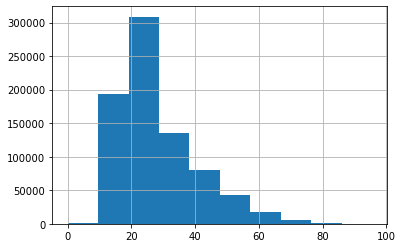

In [51]:
dfnaclean.Age.hist() # não é simetrico

Na visualização acima é possível observar que os dados não são simétricos, portanto iremos observar o log.

In [52]:
from numpy import log10
dfnaclean['Age_log'] = log10(dfnaclean[dfnaclean.Age > 0].Age)

C:\Users\GODZILLA\AppData\Local\Temp\ipykernel_17484\2504043952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnaclean['Age_log'] = log10(dfnaclean[dfnaclean.Age > 0].Age)


<AxesSubplot:>

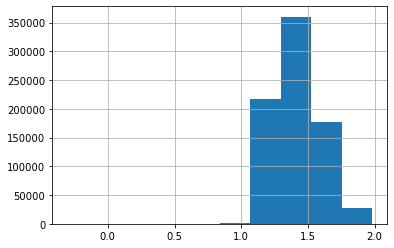

In [53]:
dfnaclean['Age_log'].hist()

O log da idade representa uma distribuição normal portanto vamos aplicar o método de Tukey nela.

<AxesSubplot:>

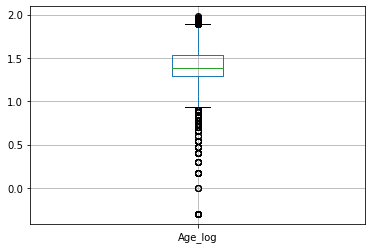

In [54]:
dfnaclean.boxplot(column=['Age_log'])

In [55]:
q1= dfnaclean['Age_log'].quantile(q=0.25)
q3= dfnaclean['Age_log'].quantile(q=0.75)
iqr= q3- q1
print(iqr)

0.24144430567973707


In [56]:
dfnaclean.shape

(785296, 23)

In [57]:
dfnaclean = dfnaclean[(dfnaclean['Age_log'] < (q3 + 1.5*iqr)) 
                        &(dfnaclean['Age_log'] > (q1 - 1.5*iqr))]

In [58]:
dfnaclean.shape

(784395, 23)

In [59]:
dfnaclean['Age'].describe()['mean']

28.130549659291557

In [60]:
dfnaclean['Age'].describe()

count    784395.000000
mean         28.130550
std          12.000143
min           8.500000
25%          19.500000
50%          24.500000
75%          34.000000
max          78.000000
Name: Age, dtype: float64

In [61]:
dfcopy['Age'].describe()

count    785296.000000
mean         28.158649
std          12.088286
min           0.000000
25%          19.500000
50%          24.500000
75%          34.000000
max          95.500000
Name: Age, dtype: float64

Percebe-se que houve uma mudança considerável nos valores máximo e mínimo e uma pequena mudança na mediana e média.

##### 2.4.2 Peso corporal por método de Tukey

A mesma técnica aplicada a idade será aplicada ao peso corporal.

In [62]:
dfcopy = dfnaclean.copy()

In [63]:
dfnaclean['BodyweightKg'].describe()

count    784395.000000
mean         81.950307
std          21.831267
min          35.000000
25%          65.800000
50%          80.600000
75%          94.800000
max         260.000000
Name: BodyweightKg, dtype: float64

<AxesSubplot:>

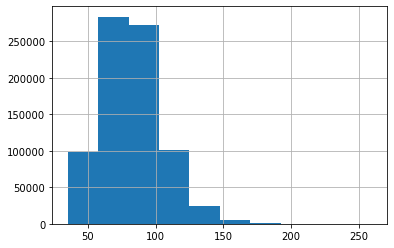

In [64]:
dfnaclean.BodyweightKg.hist()

In [65]:
dfnaclean['BodyweightKg_log'] = log10(dfnaclean['BodyweightKg'])

<AxesSubplot:>

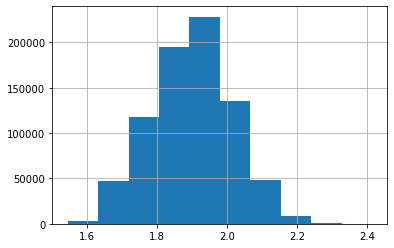

In [66]:
dfnaclean['BodyweightKg_log'].hist()

O log da idade representa uma distribuição normal portanto vamos aplicar o método de Tukey nela.

<AxesSubplot:>

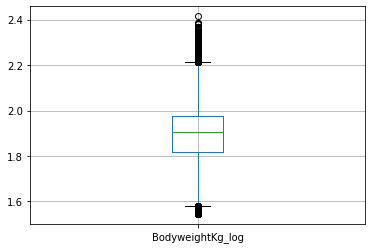

In [67]:
dfnaclean.boxplot(column=['BodyweightKg_log'])

In [68]:
q1= dfnaclean['BodyweightKg_log'].quantile(q=0.25)
q3= dfnaclean['BodyweightKg_log'].quantile(q=0.75)
iqr= q3- q1
print(iqr)

0.1585824437241108


In [69]:
dfnaclean.shape

(784395, 24)

In [70]:
dfnaclean = dfnaclean[(dfnaclean['BodyweightKg_log'] < (q3 + 1.5*iqr)) 
                        &(dfnaclean['BodyweightKg_log'] > (q1 - 1.5*iqr))]

In [71]:
dfnaclean.shape

(781914, 24)

In [72]:
dfnaclean['BodyweightKg'].describe()

count    781914.000000
mean         81.751195
std          21.326944
min          38.050000
25%          65.800000
50%          80.600000
75%          94.500000
max         163.900000
Name: BodyweightKg, dtype: float64

In [73]:
dfcopy['BodyweightKg'].describe()

count    784395.000000
mean         81.950307
std          21.831267
min          35.000000
25%          65.800000
50%          80.600000
75%          94.800000
max         260.000000
Name: BodyweightKg, dtype: float64

Novamente o valor máximo e mínimo foi modificado enquanto que os valores de média e mediana se mantiveram próximos ou constantes.

##### 2.4.3 Peso levantado em agachamento, supino e deadlift por método de Tukey

O método de Tukey também será aplicado às colunas do agachamento, supino e deadlift.

In [74]:
dfcopy = dfnaclean.copy()

In [75]:
dfnaclean[['Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg']].describe()

,Best3SquatKg,Best3BenchKg,Best3DeadliftKg
count,781914.000000,781914.000000,781914.000000
mean,177.543847,115.328267,195.771841
std,66.975188,49.121283,61.288064
min,10.000000,6.800000,7.500000
25%,125.000000,75.000000,145.000000
50%,175.000000,115.000000,199.580000
75%,222.500000,149.690000,240.000000
max,517.500000,408.500000,465.000000


<AxesSubplot:>

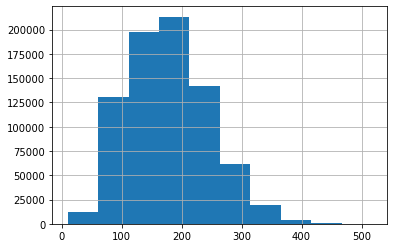

In [76]:
dfnaclean.Best3SquatKg.hist()

<AxesSubplot:>

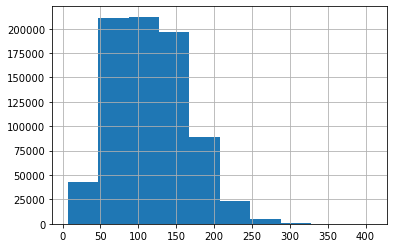

In [77]:
dfnaclean.Best3BenchKg.hist()

<AxesSubplot:>

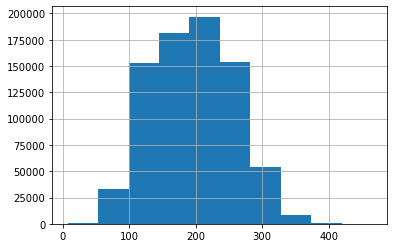

In [78]:
dfnaclean.Best3DeadliftKg.hist()

<AxesSubplot:>

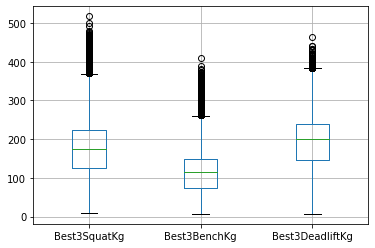

In [79]:
dfnaclean.boxplot(column=['Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg'])

In [80]:
q1S = dfnaclean['Best3SquatKg'].quantile(q=0.25)
q3S = dfnaclean['Best3SquatKg'].quantile(q=0.75)
iqrS = q3S - q1S
print(iqrS)

97.5


In [81]:
q1B = dfnaclean['Best3BenchKg'].quantile(q=0.25)
q3B = dfnaclean['Best3BenchKg'].quantile(q=0.75)
iqrB = q3B - q1B
print(iqrB)

74.69


In [82]:
q1D = dfnaclean['Best3DeadliftKg'].quantile(q=0.25)
q3D = dfnaclean['Best3DeadliftKg'].quantile(q=0.75)
iqrD = q3D - q1D
print(iqrD)

95.0


In [83]:
dfnaclean.shape

(781914, 24)

In [84]:
dfnaclean = dfnaclean[(dfnaclean['Best3SquatKg'] < (q3S + 1.5*iqrS)) 
                        &(dfnaclean['Best3SquatKg'] > (q1S - 1.5*iqrS)) 
                    & (dfnaclean['Best3BenchKg'] < (q3B + 1.5*iqrB))
                        &(dfnaclean['Best3BenchKg'] > (q1B - 1.5*iqrB)) 
                    & (dfnaclean['Best3DeadliftKg'] < (q3D + 1.5*iqrD))
                        &(dfnaclean['Best3DeadliftKg'] > (q1D - 1.5*iqrD))]

In [85]:
dfnaclean.shape

(776116, 24)

In [86]:
dfnaclean[['Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg']].describe()

,Best3SquatKg,Best3BenchKg,Best3DeadliftKg
count,776116.000000,776116.000000,776116.000000
mean,176.135664,114.218138,194.854131
std,65.066060,47.493456,60.471204
min,10.000000,6.800000,7.500000
25%,125.000000,74.840000,145.000000
50%,172.500000,112.500000,197.500000
75%,220.000000,147.500000,240.000000
max,367.500000,261.000000,381.020000


In [87]:
dfcopy[['Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg']].describe()

,Best3SquatKg,Best3BenchKg,Best3DeadliftKg
count,781914.000000,781914.000000,781914.000000
mean,177.543847,115.328267,195.771841
std,66.975188,49.121283,61.288064
min,10.000000,6.800000,7.500000
25%,125.000000,75.000000,145.000000
50%,175.000000,115.000000,199.580000
75%,222.500000,149.690000,240.000000
max,517.500000,408.500000,465.000000


Para todas essas variáveis houve apenas a diminuição do valor máximo porém a média e mediana ainda apresentaram apenas pequenas variações.

##### 2.4.4 Removendo outliers usando razão de duas variáveis

Uma outra maneira de remover outliers é utilizando o método de tukey na relação de duas variáveis, nesse caso serão analisados as colunas de peso corporal e peso total levantado.

In [88]:
dfcopy = dfnaclean.copy()

<AxesSubplot:xlabel='BodyweightKg', ylabel='TotalKg'>

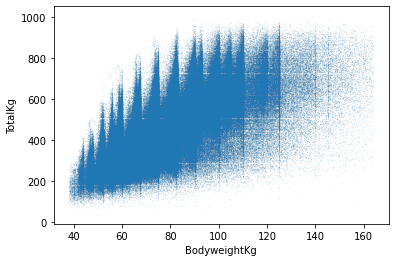

In [89]:
dfnaclean.plot.scatter(x='BodyweightKg',y='TotalKg', s=.001)

Vamos criar uma coluna com a divisão do peso levantado pelo peso corporal

In [90]:
dfnaclean['total_bodyweight'] = dfnaclean['TotalKg']/dfnaclean['BodyweightKg']

<AxesSubplot:>

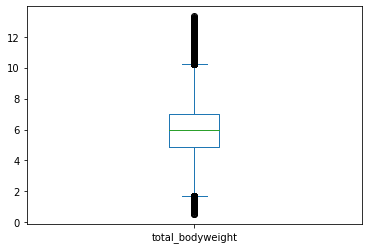

In [91]:
dfnaclean['total_bodyweight'].plot.box()

In [92]:
dfnaclean['total_bodyweight'].describe()

count    776116.000000
mean          5.979264
std           1.568640
min           0.533887
25%           4.880444
50%           5.962963
75%           7.017440
max          13.327289
Name: total_bodyweight, dtype: float64

<AxesSubplot:>

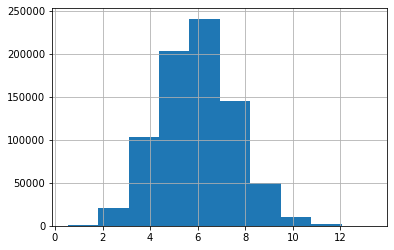

In [93]:
dfnaclean['total_bodyweight'].hist()

Como há uma distribuição simétrica, aplica-se diretamente o método de Tukey.

In [94]:
q1 = dfnaclean['total_bodyweight'].quantile(q=0.25)
q3 = dfnaclean['total_bodyweight'].quantile(q=0.75)
iqr = q3 - q1
print(iqr)

2.1369959612114267


In [95]:
dfnaclean.shape

(776116, 25)

In [96]:
dfnaclean = dfnaclean[(dfnaclean['total_bodyweight'] < (q3 + 1.5*iqr)) 
                        &(dfnaclean['total_bodyweight'] > (q1 - 1.5*iqr)) 
                    ]

In [97]:
dfnaclean.shape

(771569, 25)

In [98]:
dfnaclean['total_bodyweight'].describe()

count    771569.000000
mean          5.955861
std           1.529312
min           1.676970
25%           4.875339
50%           5.953046
75%           6.999385
max          10.222868
Name: total_bodyweight, dtype: float64

In [99]:
(dfcopy['TotalKg']/dfcopy['BodyweightKg']).describe()

count    776116.000000
mean          5.979264
std           1.568640
min           0.533887
25%           4.880444
50%           5.962963
75%           7.017440
max          13.327289
dtype: float64

Como esperado, os valores de mínimo e máximo se modificaram enquanto que a mediana e média ficaram praticamente não modificadas.

##### 2.4.5 Removendo outliers com Isolation Forests

Para as colunas de métricas, o método Isolation Forests será utilizado para remoção dos outliers.

In [100]:
codes = ['Dots', 'Wilks', 'Glossbrenner', 'Goodlift']

array([[<AxesSubplot:title={'center':'Dots'}>,
        <AxesSubplot:title={'center':'Wilks'}>],
       [<AxesSubplot:title={'center':'Glossbrenner'}>,
        <AxesSubplot:title={'center':'Goodlift'}>]], dtype=object)

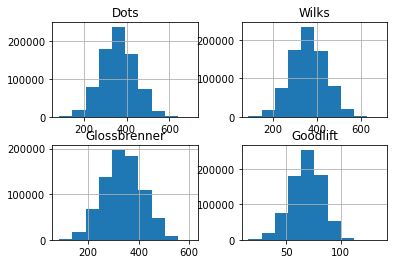

In [101]:
dfnaclean[codes].hist()

<AxesSubplot:>

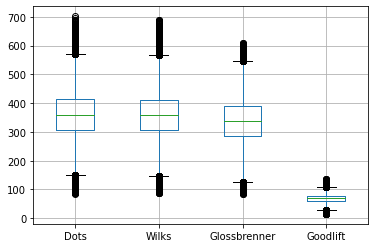

In [102]:
dfnaclean[codes].boxplot()

Ambas as 4 colunas possuem distruição simétrica como é possível observar no boxplot e histograma acima.

In [103]:
dfcopy = dfnaclean.copy()

O IsolationForest seleciona randomicamente uma feature e então seleciona um valor aleatório entre o mínimo e máximo da feature.

In [104]:
from sklearn.ensemble import IsolationForest
isolFor = IsolationForest(max_samples=100, random_state=42)
isolFor.fit(dfnaclean[codes])

IsolationForest(max_samples=100, random_state=42)

In [105]:
dfnaclean['outlierIsol'] = isolFor.predict(dfnaclean[codes])

C:\Users\GODZILLA\AppData\Local\Temp\ipykernel_17484\3421185214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnaclean['outlierIsol'] = isolFor.predict(dfnaclean[codes])


In [106]:
dfnaclean = dfnaclean[dfnaclean['outlierIsol'] != -1].drop(['outlierIsol'], axis=1)

In [107]:
dfnaclean[codes].describe()

,Dots,Wilks,Glossbrenner,Goodlift
count,568810.000000,568810.000000,568810.000000,568810.000000
mean,359.527521,357.927874,336.611051,68.852978
std,47.998261,47.836152,48.492746,9.360844
min,248.600000,247.220000,236.230000,48.570000
25%,322.150000,320.712500,299.060000,61.720000
50%,359.430000,357.750000,336.770000,68.870000
75%,396.940000,395.150000,374.100000,75.650000
max,473.270000,469.220000,455.670000,89.790000


In [108]:
dfcopy[codes].describe()

,Dots,Wilks,Glossbrenner,Goodlift
count,771569.000000,771569.000000,771569.000000,771569.000000
mean,360.446855,358.907233,337.159740,68.322968
std,78.396080,77.948068,76.541728,14.285491
min,85.300000,86.790000,84.940000,14.880000
25%,307.380000,306.070000,284.090000,58.850000
50%,359.890000,358.250000,337.240000,68.960000
75%,413.120000,411.200000,389.740000,78.340000
max,702.210000,688.870000,608.330000,136.800000


Percebe-se que o máximo e mínimo mudaram bastante e a mediana e média sofreram poucas modificações.

#### 2.5 Discretização dos dados

##### 2.5.1 Discretização do peso corporal

Será feita a discretização da coluna de peso corporal por intervalos de mesma frequência. Essa coluna foi discretizada pois a mesma será utilizada para classificação.

In [109]:
dfnaclean['BodyweightKg_dist'] = pd.qcut(dfnaclean['BodyweightKg'], 5)

In [110]:
dfnaclean['BodyweightKg_dist'].describe()

count           568810
unique               5
top       (84.9, 99.1]
freq            113885
Name: BodyweightKg_dist, dtype: object

In [111]:
dfnaclean['BodyweightKg_dist'].value_counts()

(84.9, 99.1]       113885
(64.09, 74.1]      113849
(74.1, 84.9]       113796
(38.049, 64.09]    113769
(99.1, 163.9]      113511
Name: BodyweightKg_dist, dtype: int64

##### 2.5.2 Discretização da idade

Será feita a discretização da coluna de idade por intervalos de mesma frequência. Essa coluna foi discretizada pois a mesma será utilizada em algumas das hipóteses.

In [112]:
dfnaclean['Age_dist'] = pd.qcut(dfnaclean['Age'], 5)

In [113]:
dfnaclean['Age_dist'].describe()

count            568810
unique                5
top       (8.499, 18.5]
freq             123757
Name: Age_dist, dtype: object

In [114]:
dfnaclean['Age_dist'].value_counts()

(8.499, 18.5]    123757
(22.0, 27.5]     119572
(37.5, 78.0]     113648
(27.5, 37.5]     107196
(18.5, 22.0]     104637
Name: Age_dist, dtype: int64

### 3. Estatisticas descritivas dos dados e visualização

In [115]:
dfnaclean.columns

Index(['Name', 'Sex', 'Event', 'Equipment', 'Division', 'BodyweightKg',
       'WeightClassKg', 'Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg',
       'TotalKg', 'Place', 'Dots', 'Wilks', 'Glossbrenner', 'Goodlift',
       'EquipmentC', 'DivisionC', 'WeightClassKgC', 'PlaceC', 'NameC', 'Age',
       'Age_log', 'BodyweightKg_log', 'total_bodyweight', 'BodyweightKg_dist',
       'Age_dist'],
      dtype='object')

In [116]:
dfnaclean.shape

(568810, 27)

Após as etapas anteriores, os dados passaram de 2.7 milhões para cerca de 570 mil linhas.

#### 3.1 Estatísticas descritivas

In [117]:
dfnaclean.describe()

,Sex,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Dots,Wilks,Glossbrenner,Goodlift,EquipmentC,DivisionC,WeightClassKgC,PlaceC,NameC,Age,Age_log,BodyweightKg_log,total_bodyweight
count,568810.000000,568810.000000,568810.000000,568810.000000,568810.000000,568810.000000,568810.000000,568810.000000,568810.000000,568810.000000,568810.000000,568810.000000,568810.000000,568810.000000,568810.000000,568810.000000,568810.000000,568810.000000,568810.000000
mean,0.723514,82.072621,175.282608,113.651458,196.450341,485.383884,359.527521,357.927874,336.611051,68.852978,0.342652,1433.190707,149.261662,28.012354,243856.486943,28.268291,1.418747,1.900668,5.961761
std,0.447268,20.687036,50.785754,39.608544,49.093086,132.870017,47.998261,47.836152,48.492746,9.360844,0.474597,582.504618,80.367853,29.547787,139652.108337,11.754245,0.163417,0.108533,1.102719
min,0.000000,38.050000,15.880000,20.000000,20.410000,178.000000,248.600000,247.220000,236.230000,48.570000,0.000000,3.000000,0.000000,0.000000,0.000000,8.500000,0.929419,1.580355,2.341295
25%,0.000000,66.500000,135.000000,80.000000,155.000000,375.000000,322.150000,320.712500,299.060000,61.720000,0.000000,885.000000,92.000000,0.000000,124913.000000,19.500000,1.290035,1.822822,5.154424
50%,1.000000,80.900000,175.000000,115.000000,200.000000,492.500000,359.430000,357.750000,336.770000,68.870000,0.000000,1727.000000,162.000000,32.000000,247033.000000,24.500000,1.389166,1.907949,5.954825
75%,1.000000,94.200000,210.000000,142.500000,235.000000,587.500000,396.940000,395.150000,374.100000,75.650000,1.000000,1868.000000,218.000000,43.000000,362083.500000,34.000000,1.531479,1.974051,6.749156
max,2.000000,163.900000,367.500000,260.820000,380.000000,850.000000,473.270000,469.220000,455.670000,89.790000,1.000000,2428.000000,277.000000,119.000000,477323.000000,78.000000,1.892095,2.214579,9.082308


Abaixo estão as covariâncias entre as colunas do dataset, que indica a relação entre as variáveis mas não o grau.

In [118]:
dfnaclean.cov()

,Sex,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Dots,Wilks,Glossbrenner,Goodlift,EquipmentC,DivisionC,WeightClassKgC,PlaceC,NameC,Age,Age_log,BodyweightKg_log,total_bodyweight
Sex,0.200049,4.307405,14.912719,12.761682,15.942657,43.617069,3.267671,3.007497,8.501952,0.482707,0.009016,5.420069e+01,-2.656171,1.372591,6.251082e+02,0.013858,-0.000699,0.024551,0.254187
BodyweightKg,4.307405,427.953448,742.899890,580.241172,707.882205,2031.023993,126.658512,96.909346,171.064193,34.922740,-0.679931,1.216760e+03,-583.946515,-9.021369,-2.886654e+04,39.194095,0.632322,2.216445,-3.913495
Best3SquatKg,14.912719,742.899890,2579.192849,1738.085889,2175.466521,6492.744071,1584.471286,1517.841756,1801.714705,241.233242,5.177021,4.679247e+03,-849.619206,76.819489,5.129031e+04,20.483265,0.501308,3.998607,28.270223
Best3BenchKg,12.761682,580.241172,1738.085889,1568.836792,1634.590995,4941.512654,1028.437346,980.572016,1248.190355,167.817000,2.415901,4.636383e+03,-705.689784,44.885851,6.246872e+04,54.167561,0.960881,3.130314,20.369070
Best3DeadliftKg,15.942657,707.882205,2175.466521,1634.590995,2410.131118,6220.187595,1345.589332,1272.871006,1604.781481,259.696866,0.225367,5.092637e+03,-690.551920,35.851343,2.043307e+04,48.430767,0.961943,3.879807,27.178072
TotalKg,43.617069,2031.023993,6492.744071,4941.512654,6220.187595,17654.441392,3958.491269,3771.277886,4654.680423,668.746999,7.818204,1.440823e+04,-2245.858212,157.562225,1.341893e+05,123.080374,2.424119,11.008733,75.817252
Dots,3.267671,126.658512,1584.471286,1028.437346,1345.589332,3958.491269,2303.833075,2285.666922,2235.239833,352.945087,7.070889,2.738737e+03,-195.811797,-17.189892,1.088142e+05,-7.898893,0.246915,0.688805,39.821113
Wilks,3.007497,96.909346,1517.841756,980.572016,1272.871006,3771.277886,2285.666922,2288.297461,2235.540547,345.471332,7.267477,2.716711e+03,-310.368156,-22.604569,1.196297e+05,-12.592714,0.162631,0.468403,39.977221
Glossbrenner,8.501952,171.064193,1801.714705,1248.190355,1604.781481,4654.680423,2235.239833,2235.540547,2351.546447,334.804454,7.217775,4.053809e+03,-326.565465,19.339608,1.382719e+05,-16.629772,0.049474,0.913505,46.076666
Goodlift,0.482707,34.922740,241.233242,167.817000,259.696866,668.746999,352.945087,345.471332,334.804454,87.625396,-1.471285,3.464029e+02,-9.444669,-25.194975,-1.109397e+04,2.985194,0.154116,0.198443,5.633180


Para observar o grau, é utilizado a correlação das variáveis, observada na tabela abaixo.

In [119]:
dfnaclean.corr()

,Sex,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Dots,Wilks,Glossbrenner,Goodlift,EquipmentC,DivisionC,WeightClassKgC,PlaceC,NameC,Age,Age_log,BodyweightKg_log,total_bodyweight
Sex,1.000000,0.465532,0.656518,0.720362,0.726060,0.733941,0.152211,0.140566,0.391989,0.115292,0.042473,0.208035,-0.073893,0.103860,0.010008,0.002636,-0.009563,0.505752,0.515372
BodyweightKg,0.465532,1.000000,0.707115,0.708144,0.697015,0.738907,0.127559,0.097929,0.170523,0.180341,-0.069253,0.100973,-0.351231,-0.014759,-0.009992,0.161186,0.187044,0.987180,-0.171554
Best3SquatKg,0.656518,0.707115,1.000000,0.864053,0.872550,0.962187,0.650005,0.624782,0.731589,0.507435,0.214790,0.158174,-0.208161,0.051192,0.007232,0.034313,0.060404,0.725445,0.504804
Best3BenchKg,0.720362,0.708144,0.864053,1.000000,0.840620,0.938953,0.540958,0.517529,0.649853,0.452618,0.128518,0.200951,-0.221688,0.038353,0.011293,0.116347,0.148451,0.728177,0.466356
Best3DeadliftKg,0.726060,0.697015,0.872550,0.840620,1.000000,0.953578,0.571040,0.542011,0.674091,0.565108,0.009673,0.178083,-0.175022,0.024715,0.002980,0.083928,0.119904,0.728161,0.502034
TotalKg,0.733941,0.738907,0.962187,0.938953,0.953578,1.000000,0.620693,0.593342,0.722414,0.537675,0.123981,0.186159,-0.210316,0.040133,0.007232,0.078807,0.111643,0.763393,0.517459
Dots,0.152211,0.127559,0.650005,0.540958,0.571040,0.620693,1.000000,0.995477,0.960333,0.785537,0.310401,0.097955,-0.050761,-0.012121,0.016234,-0.014001,0.031479,0.132224,0.752355
Wilks,0.140566,0.097929,0.624782,0.517529,0.542011,0.593342,0.995477,1.000000,0.963717,0.771509,0.320113,0.097496,-0.080731,-0.015992,0.017908,-0.022396,0.020804,0.090220,0.757864
Glossbrenner,0.391989,0.170523,0.731589,0.649853,0.674091,0.722414,0.960333,0.963717,1.000000,0.737564,0.313619,0.143512,-0.083794,0.013497,0.020418,-0.029175,0.006243,0.173569,0.861667
Goodlift,0.115292,0.180341,0.507435,0.452618,0.565108,0.537675,0.785537,0.771509,0.737564,1.000000,-0.331175,0.063528,-0.012554,-0.091091,-0.008486,0.027131,0.100748,0.195325,0.545725


#### 3.2 Visualização dos dados

Abaixo é possível observar o boxplot das principais colunas do dataset.

<AxesSubplot:>

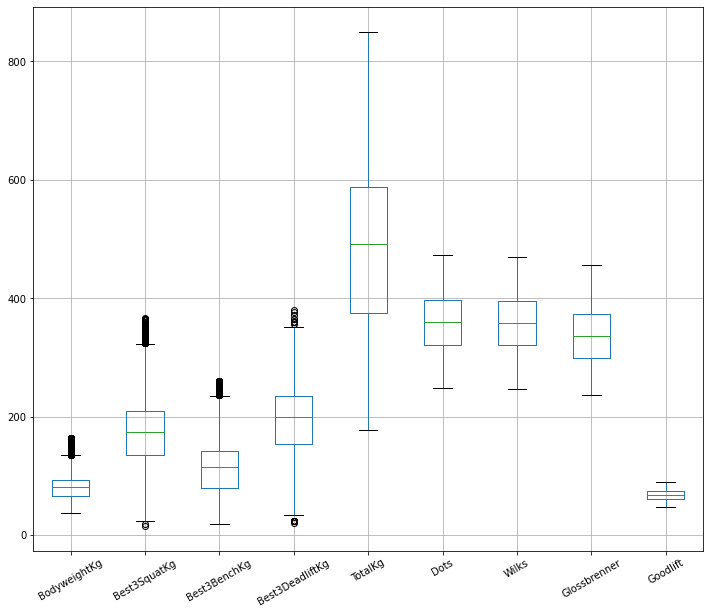

In [120]:
dfnaclean[['BodyweightKg', 'Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg', 'TotalKg', 'Dots', 'Wilks', 'Glossbrenner', 'Goodlift']].boxplot(rot=30, figsize=(12, 10))

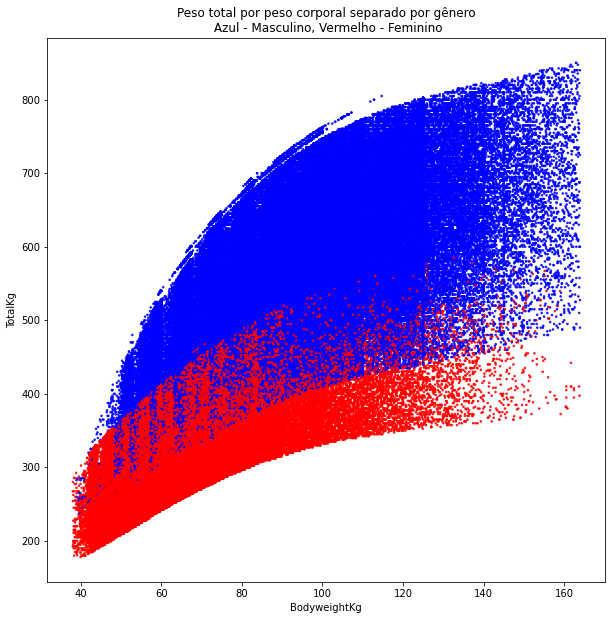

In [121]:
fig, ax = plt.subplots(figsize=(10, 10))
a = ax.scatter(dfnaclean['BodyweightKg'], dfnaclean['TotalKg'], alpha=0.8, s=2.5,
           c=['r' if x == 0 else 'b' for x in dfnaclean['Sex']], 
           label=['Masculino' if x == 0 else 'Feminino' for x in dfnaclean['Sex']])

plt.title("Peso total por peso corporal separado por gênero\n Azul - Masculino, Vermelho - Feminino")
plt.xlabel("BodyweightKg")
plt.ylabel("TotalKg")
plt.show()

Acima está o gráfico com a relação de peso corporal e peso total levantado separado por gênero, é possível observar que o gráfico se divide basicamente 3 regiões: Majoritariamente masculina, majoritariamente feminina e mista. É possível observar também que há uma relação logarítimica entre o peso corporal e o peso total levantado.

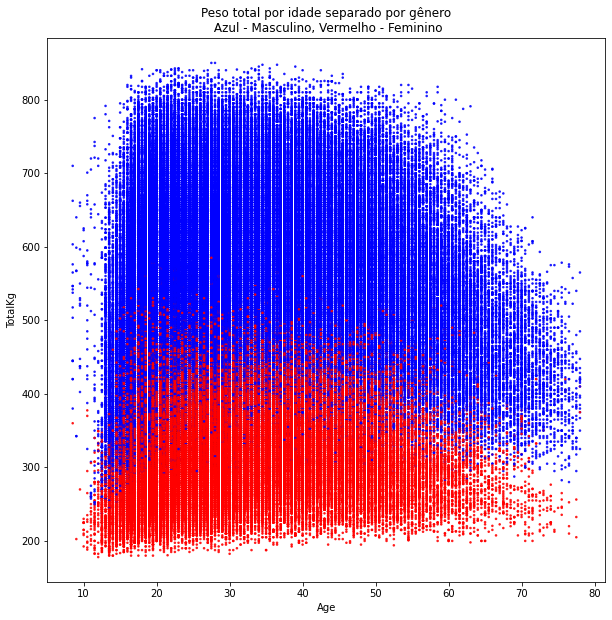

In [122]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(dfnaclean['Age'], dfnaclean['TotalKg'], alpha=0.8, s=2.5,
           c=['r' if x == 0 else 'b' for x in dfnaclean['Sex']])

plt.title("Peso total por idade separado por gênero\n Azul - Masculino, Vermelho - Feminino")
plt.xlabel("Age")
plt.ylabel("TotalKg")
plt.show()

Acima está o gráfico com a relação de idade e peso total levantado separado por gênero, é possível observar que o gráfico também se divide basicamente 3 regiões: Majoritariamente masculina, majoritariamente feminina e mista.

#### 3.3 Análise da evolução de indivíduos

Abaixo, é possível observar os atletas com maiores aparições nos dados.

In [123]:
dfnaclean['Name'].value_counts()

Jackie Blasbery    125
Jenny Hunter       122
Max Bristow        121
Judy Gedney        112
Libor Novák        105
                  ... 
Layla Poole          0
Layla Renteria       0
Layla Rivera         0
Layla Rodriguez      0
Josephine Cook       0
Name: Name, Length: 477324, dtype: int64

Será analizado os 3 atletas mais recorrentes.

In [124]:
names = dfnaclean['Name'].value_counts().index[:3].tolist()
print(names)

['Jackie Blasbery', 'Jenny Hunter', 'Max Bristow']


A função abaixo plota o peso total e peso corporal do atleta com a idade.

In [125]:
def person_evo(name):
    print(name)
    dfnaclean[dfnaclean['Name'] == name].plot.scatter(x='Age',y='TotalKg', s=2)
    dfnaclean[dfnaclean['Name'] == name].plot.scatter(x='Age',y='BodyweightKg', s=2)
    plt.show()
    print("##################################################")

Jackie Blasbery


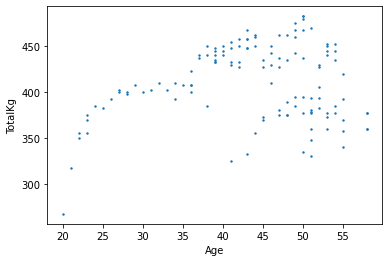

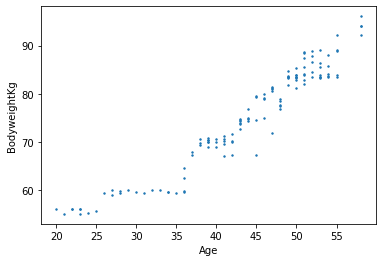

##################################################
Jenny Hunter


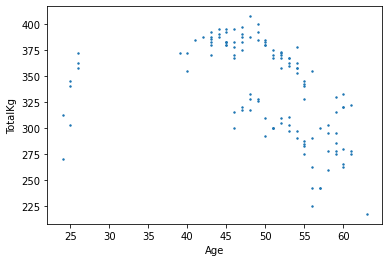

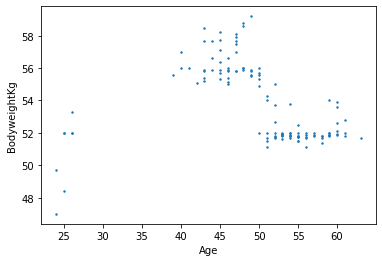

##################################################
Max Bristow


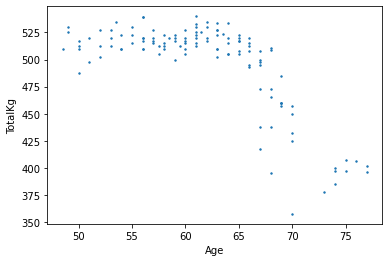

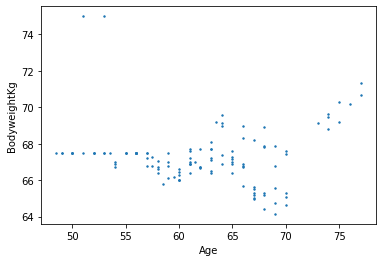

##################################################


[None, None, None]

In [126]:
[person_evo(i) for i in names]

É possível observar que alguns dos atletas alcançaram seus picos em idades mais avançadas (50 a 60 anos). Idades que geralmente acredita-se que as pessoas estão ficando mais fracas. Interessante também o atleta Jenny Hunter passou mais de 15 anos sem competir e voltou melhor do que antes.

#### 3.4 Distribuição de idade por melhores pesos dos equipamentos

In [127]:
dfnaclean['Age_dist'].value_counts()

(8.499, 18.5]    123757
(22.0, 27.5]     119572
(37.5, 78.0]     113648
(27.5, 37.5]     107196
(18.5, 22.0]     104637
Name: Age_dist, dtype: int64

In [128]:
mini = dfnaclean.sample(frac = 0.05, random_state=53)
label = mini['Age_dist'].cat.codes
color = ['red', 'blue', 'green', 'yellow', 'orange']

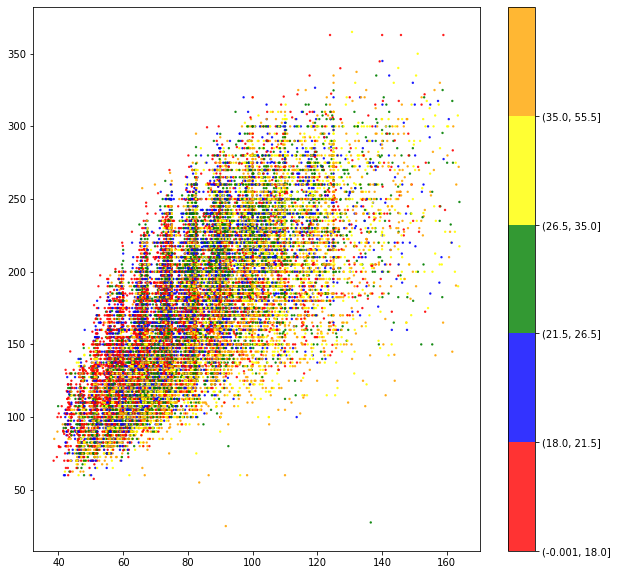

In [129]:
## peso de agachamento por peso corporal, separado por idade
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(mini['BodyweightKg'], mini['Best3SquatKg'], alpha=0.8, s=2,
           c=label, cmap = matplotlib.colors.ListedColormap(color))
cb = plt.colorbar()
loc = np.arange(0, max(label), max(label)/float(len(color)))
cb.set_ticks(loc)
cb.set_ticklabels(['(-0.001, 18.0]', '(18.0, 21.5]', '(21.5, 26.5]', '(26.5, 35.0]', '(35.0, 55.5]'])

É possível observar que não há uma relação clara entre a classe de idade e o agachamento e o peso total. Dado que é possível observar todas as classes de idade por todo o gráfico.

### 4. Hipóteses e testes de hipótese

In [130]:
def get_plot_and_stats(bincategory, column, dicti, title, samples=500):
    dfnaclean.boxplot(column=column, by=bincategory, figsize=(7, 7))
    plt.show()
    cate = dfnaclean[bincategory].value_counts()
    df1 = dfnaclean[dfnaclean[bincategory] == cate.index[1]]
    df0 = dfnaclean[dfnaclean[bincategory] == cate.index[0]]
    df0_sample = df0[column].sample(n=samples)
    df0_sample.hist(bins=40, label = dicti[0])
    df1_sample = df1[column].sample(n=samples)
    df1_sample.hist(bins=40, label = dicti[1])
    plt.title(title)
    plt.legend()
    shap0 = stats.shapiro(df0_sample)[1]
    shap1 = stats.shapiro(df1_sample)[1]
    if shap0 > 0.05:
        print("Dados com distribuição Normal, p-value:")
    else:
        print("Dados sem distribuição Normal, p-value:")
    print(dicti[0] + ' ' + str(shap0))
    if shap1 > 0.05:
        print("Dados com distribuição Normal, p-value:")
    else:
        print("Dados sem distribuição Normal, p-value:")
    print(dicti[1] + ' ' + str(shap1))
    if (shap0 > 0.05) & (shap1 > 0.05):
        print("P value do t teste não pareado: " + str(stats.ttest_ind(df0_sample, df1_sample)[1]))
    else:  
        print("P value do teste mannwhitneyu: " + str(stats.mannwhitneyu(df0_sample, df1_sample)[1]))

A função acima performa os cálculos de normalidade e determina o teste necessário a ser utilizado, para todas as hipóteses os dados foram sampleados para 500 pois essas funções não são precisas para muitos valores.

#### 4.1 - Relação do sexo com o peso total levantado e com cada exercício separado

In [131]:
dicti = {0:'M', 1:'F'}

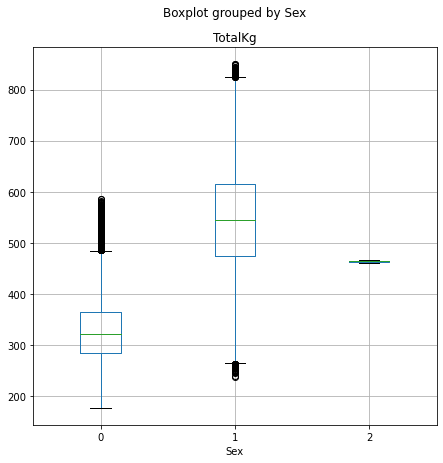

Dados sem distribuição Normal, p-value:
M 0.0048371851444244385
Dados sem distribuição Normal, p-value:
F 7.630031177541241e-05
P value do teste mannwhitneyu: 1.795492022190339e-146


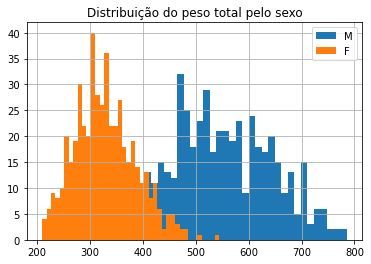

In [132]:
get_plot_and_stats('Sex', 'TotalKg', dicti, title="Distribuição do peso total pelo sexo")

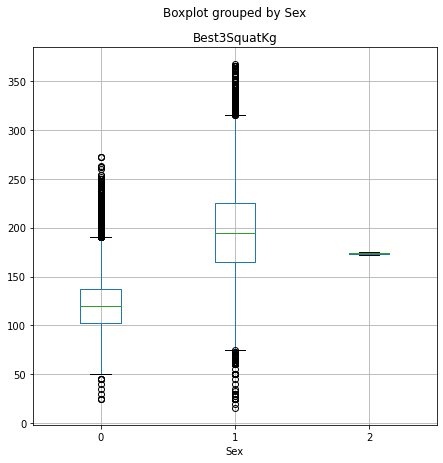

Dados sem distribuição Normal, p-value:
M 0.006755890790373087
Dados sem distribuição Normal, p-value:
F 5.232794592302525e-06
P value do teste mannwhitneyu: 3.0841991100297274e-127


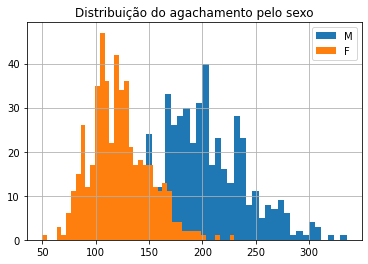

In [133]:
get_plot_and_stats('Sex','Best3SquatKg', dicti, title="Distribuição do agachamento pelo sexo")

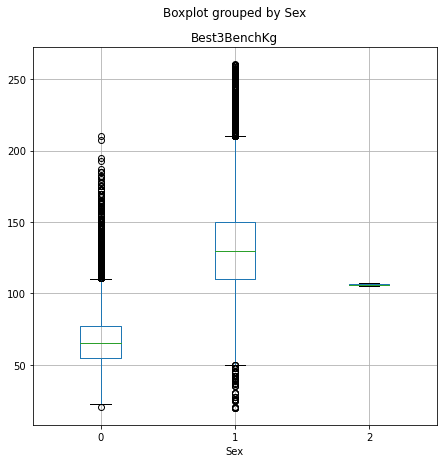

Dados sem distribuição Normal, p-value:
M 0.0067532481625676155
Dados sem distribuição Normal, p-value:
F 1.0044162089507466e-13
P value do teste mannwhitneyu: 3.080432237570792e-144


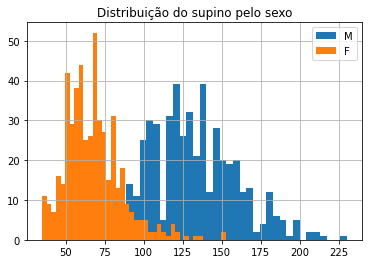

In [134]:
get_plot_and_stats('Sex','Best3BenchKg', dicti, title="Distribuição do supino pelo sexo")

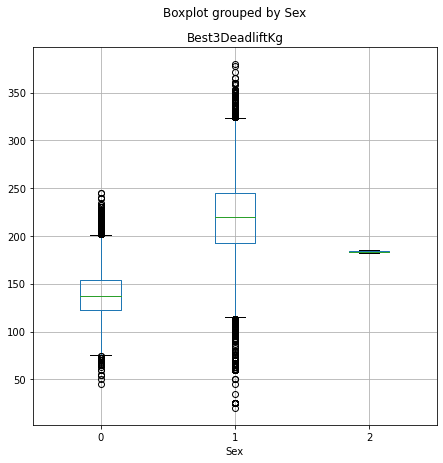

Dados com distribuição Normal, p-value:
M 0.16086427867412567
Dados sem distribuição Normal, p-value:
F 0.03486955165863037
P value do teste mannwhitneyu: 2.3573835706793023e-138


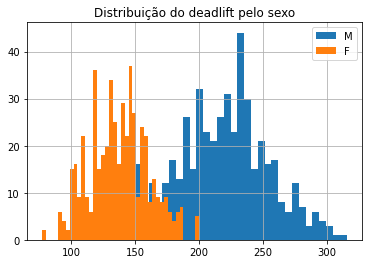

In [135]:
get_plot_and_stats('Sex','Best3DeadliftKg', dicti, title="Distribuição do deadlift pelo sexo")

Com exceção do deadlift e peso total masculino, todas as distribuições não são normais como foi possível observar nos p-values dos teste Shapiro e como não são pareados os testes realizados foram os de MannWhitneyu.

Observa-se em todos os teste de MannWhitneyu os pvalues foram menores que 0.05 logo as hipóteses nulas foram rejeitadas. Portanto, o peso levantado por homens e mulheres vem de distribuições diferentes.

#### 4.2 - Relação do sexo com o peso corporal

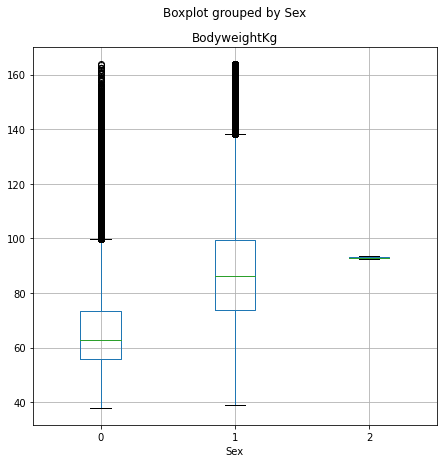

Dados sem distribuição Normal, p-value:
M 2.389656401646789e-07
Dados sem distribuição Normal, p-value:
F 1.7440054699630692e-20
P value do teste mannwhitneyu: 3.1036571311411754e-74


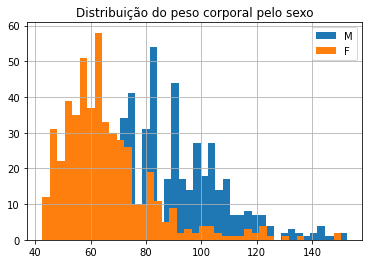

In [136]:
get_plot_and_stats('Sex','BodyweightKg', dicti, title="Distribuição do peso corporal pelo sexo")

Novamente, todas as distribuições não são normais como foi possível observar nos p-values dos teste Shapiro e como não são pareados os testes realizados foram os de MannWhitneyu.

O teste de MannWhitneyu obteve pvalue menor que 0.05 logo a hipótese nula foi rejeitada. Portanto, o peso corporal de homens e mulheres vem de distribuições diferentes.

#### 4.3 Relação do tipo de equipamento com o peso total levantado, peso corporal, idade e levantamentos individuais

In [137]:
dicti = {0:"Raw", 1:"Single-Ply"}

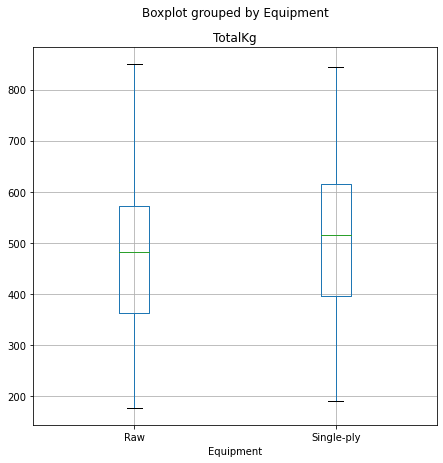

Dados sem distribuição Normal, p-value:
Raw 5.351996151148342e-06
Dados sem distribuição Normal, p-value:
Single-Ply 1.0985885410264018e-06
P value do teste mannwhitneyu: 0.000791633125396291


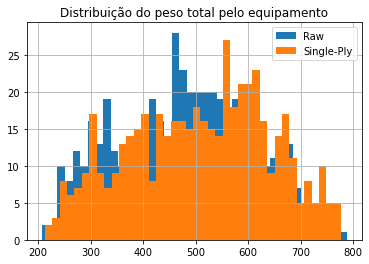

In [138]:
get_plot_and_stats('Equipment','TotalKg', dicti, title="Distribuição do peso total pelo equipamento")

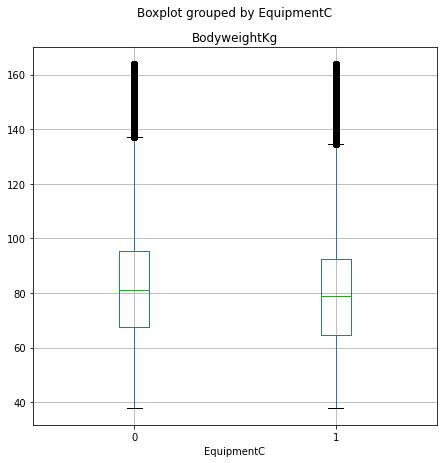

Dados sem distribuição Normal, p-value:
Raw 1.501737578735174e-08
Dados sem distribuição Normal, p-value:
Single-Ply 4.683660126403311e-10
P value do teste mannwhitneyu: 0.0030831690135207177


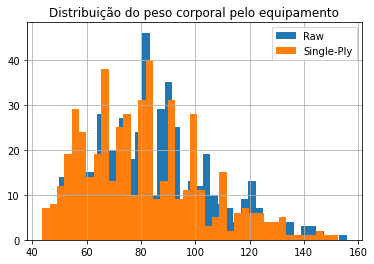

In [139]:
get_plot_and_stats('EquipmentC','BodyweightKg', dicti, title="Distribuição do peso corporal pelo equipamento")

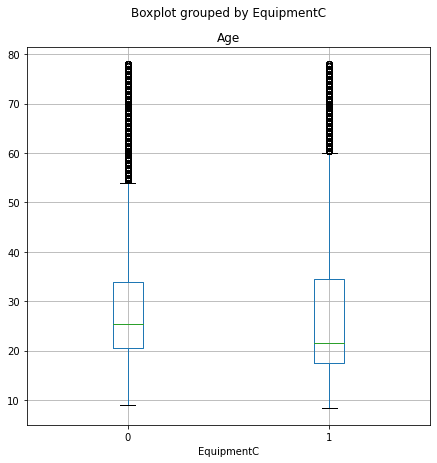

Dados sem distribuição Normal, p-value:
Raw 1.9775781203532413e-18
Dados sem distribuição Normal, p-value:
Single-Ply 3.479960550017308e-22
P value do teste mannwhitneyu: 2.1960733877416347e-06


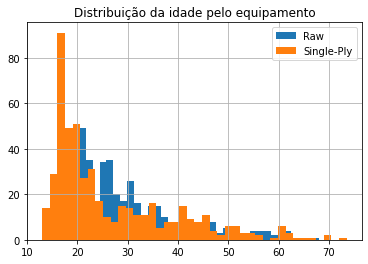

In [140]:
get_plot_and_stats('EquipmentC','Age', dicti, title="Distribuição da idade pelo equipamento")

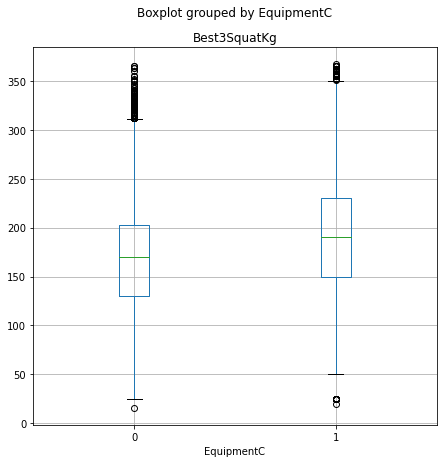

Dados sem distribuição Normal, p-value:
Raw 0.00010824477067217231
Dados sem distribuição Normal, p-value:
Single-Ply 3.5554191981646e-06
P value do teste mannwhitneyu: 6.987714220283428e-13


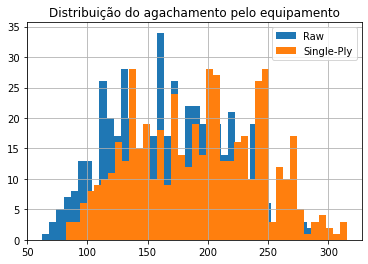

In [141]:
get_plot_and_stats('EquipmentC','Best3SquatKg', dicti, title="Distribuição do agachamento pelo equipamento")

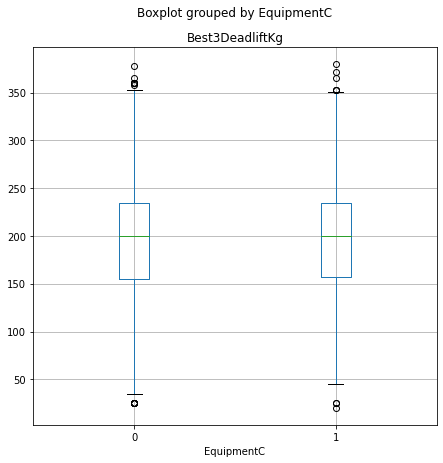

Dados sem distribuição Normal, p-value:
Raw 2.927584148437745e-07
Dados sem distribuição Normal, p-value:
Single-Ply 8.801368949207244e-07
P value do teste mannwhitneyu: 0.1526489195548091


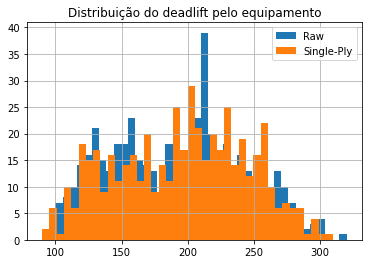

In [142]:
get_plot_and_stats('EquipmentC','Best3DeadliftKg', dicti, title="Distribuição do deadlift pelo equipamento")

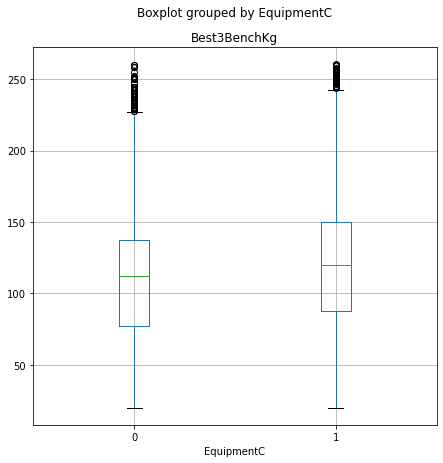

Dados sem distribuição Normal, p-value:
Raw 3.954924565618967e-08
Dados sem distribuição Normal, p-value:
Single-Ply 6.123952402958821e-07
P value do teste mannwhitneyu: 0.00272127161494859


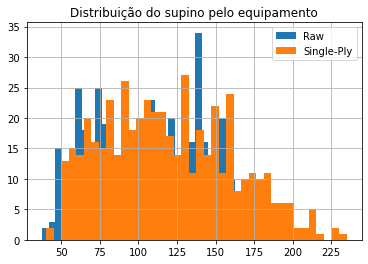

In [143]:
get_plot_and_stats('EquipmentC','Best3BenchKg', dicti, title="Distribuição do supino pelo equipamento")

Como foi possível observar, pelo teste de Shapiro nenhuma das distribuições é normal e como não são pareadas, os testes realizados foram os de MannWhitneyu.

Os resultados demonstraram que:

* Para o peso total levantado, ambos equipamentos apresentaram semelhança, com um p value de 0.08.
* Para o peso corporal, ambos equipamentos apresentaram semelhança, com um p value de 0.31.
* Para a idade, não houve semelhança entre os equipamentos, com um p value de ordem -7.
* Para o agachamento, também não houve semelhança entre os equipamentos, com um p value de ordem -10.
* Para o deadlift, houve semelhança entre os equipamentos, com um p value de 0.24.
* Para o supino, também não houve semelhança entre os equipamentos, com um p value de ordem -6.

É possível concluir então que o equipamento não traz diferença significativa no peso corporal, mas principalmente no deadlift e peso total levantado.

In [148]:
dfnaclean['Age_dist'] = dfnaclean['Age_dist'].astype('object')

In [149]:
dfnaclean.columns

Index(['Name', 'Sex', 'Event', 'Equipment', 'Division', 'BodyweightKg',
       'WeightClassKg', 'Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg',
       'TotalKg', 'Place', 'Dots', 'Wilks', 'Glossbrenner', 'Goodlift',
       'EquipmentC', 'DivisionC', 'WeightClassKgC', 'PlaceC', 'NameC', 'Age',
       'Age_log', 'BodyweightKg_log', 'total_bodyweight', 'BodyweightKg_dist',
       'Age_dist'],
      dtype='object')

In [150]:
dfnaclean['BodyweightKg_dist'] = dfnaclean['BodyweightKg_dist'].astype('object')

In [151]:
dfnaclean.to_csv('powerlifting_clean.csv', sep = ',', index=False, columns=dfnaclean.columns)